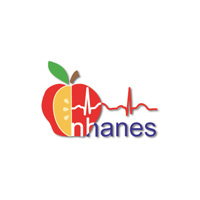


# Discription

* The National Health and Nutrition Examination Survey (NHANES) is a comprehensive research program designed to assess the health and nutrition status of adults and children in the United States. This dataset comprises a collection of surveys focusing on various population groups or health-related topics. It includes questions covering demographic, social, economic, dietary, and health-related aspects. In addition to surveys, the dataset involves medical, dental, and physiological measurements, as well as laboratory tests. Due to the encoded nature of the dataset, detailed explanations of each feature are provided in the "ColumnDefinitions" file.

# Goal
* The objective of the project is to build a regression model for predicting the likelihood of individuals being diagnosed with Cancer and Liver Disease. This involves developing a predictive model that utilizes various features or variables related to health, demographics, and potentially other factors to estimate the risk or probability of an individual having Cancer or Liver Disease. The regression model aims to establish a relationship between the input features and the likelihood of disease occurrence, allowing for predictions based on new or unseen data. The ultimate goal is to contribute to the early detection or risk assessment of Cancer and Liver Disease through the use of machine learning techniques.

# Data Sources
* https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=demographic&CycleBeginYear=2013
* https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=diet&CycleBeginYear=2013
* https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=examination&CycleBeginYear=2013
* https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=labs&CycleBeginYear=2013

### Importing Tools

In [130]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import randint

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix

### Load the datasets

In [2]:
demographic = pd.read_csv("Dataset\demographic.csv")
diet = pd.read_csv("Dataset\diet.csv")
examination = pd.read_csv("Dataset\examination.csv")
labs = pd.read_csv("Dataset\labs.csv")
questionnaire = pd.read_csv("Dataset\questionnaire.csv")

* datasets are separate and need to merge them into one dataframe

In [3]:
# merging dataframe on the SEQN feature
merged_df = pd.merge(pd.merge(demographic,diet,on='SEQN'),pd.merge(examination,labs,on='SEQN'),on='SEQN')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Columns: 860 entries, SEQN to LBDB12SI
dtypes: float64(809), int64(22), object(29)
memory usage: 64.5+ MB


* demographic's length is longer than the other dataframes. So, one approach is to extend the other datasets with null values.
* In the following, we will handle the new null values like the othe missing values. 

In [4]:
# extend the dataframes with NaN values except demographic
diff_len = len(merged_df.columns) - len(demographic.columns)
nan_arr = np.empty((diff_len))
nan_arr[:] = np.nan
for i in range(len(merged_df), len(demographic)):
    values = demographic.loc[i].to_numpy()
    values = np.append(values, nan_arr)
    row = pd.Series(values, index=merged_df.columns, name=i)
    merged_df = merged_df.append(row)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Columns: 860 entries, SEQN to LBDB12SI
dtypes: float64(831), object(29)
memory usage: 66.8+ MB


In [5]:
merged_df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727.0,8.0,2.0,1.0,26.0,NaN,2.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10171,83728.0,8.0,2.0,2.0,2.0,24.0,1.0,1.0,2.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729.0,8.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10173,83730.0,8.0,2.0,1.0,7.0,NaN,2.0,2.0,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing the datasets

In [6]:
merged_df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
count,10175.000000,10175.0,10175.000000,10175.000000,10175.000000,665.000000,10175.000000,10175.000000,10164.000000,4360.000000,...,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,1261.000000,2662.000000,5316.000000,5316.000000
mean,78819.100541,8.0,1.998919,1.506634,31.641572,10.213534,3.083243,3.276953,1.507773,107.428899,...,0.186950,0.007883,0.150535,0.162162,0.012038,0.177177,1.969072,15.670639,640.100263,472.394865
std,3025.617760,0.0,0.032864,0.499981,24.406648,6.827222,1.262192,1.606930,0.499964,69.820794,...,0.133833,0.088452,0.576409,0.368669,0.034026,0.381890,0.251651,46.735936,751.967084,554.951537
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.013000,0.000000,0.013000,0.000000,0.001400,0.000000,1.000000,0.280000,18.000000,13.300000
25%,76188.500000,8.0,2.000000,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,...,0.090000,0.000000,0.028000,0.000000,0.002600,0.000000,2.000000,3.210000,381.000000,281.200000
50%,78832.000000,8.0,2.000000,2.000000,27.000000,9.000000,3.000000,3.000000,2.000000,103.000000,...,0.159000,0.000000,0.069000,0.000000,0.005100,0.000000,2.000000,6.240000,514.000000,379.300000
75%,81469.500000,8.0,2.000000,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,...,0.252000,0.000000,0.150000,0.000000,0.010700,0.000000,2.000000,12.435000,711.000000,524.700000
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,1.290000,1.000000,25.760000,1.000000,0.843400,1.000000,3.000000,1071.300000,26801.000000,19779.100000


In [7]:
questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     10175 non-null  int64  
 1   MCQ160L  5769 non-null   float64
 2   MCQ220   5769 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 238.6 KB


### Handle the non-numeric values

In [8]:
#finding columns with object dtype
cols = merged_df.columns
object_cols = []
check = False
for col in cols:
    if check:
        object_cols.append(col)
        if col == "OHX31CTC":
            check = False
    if col == "OHX02CTC":
        check = True
        object_cols.append(col)
object_cols.append('CSXTSEQ') #by checking the csv file, I found out that it is needed to be appended.
        
#convert the object values into numeric
le = LabelEncoder()
for feature in object_cols:
    merged_df[feature] = le.fit_transform(merged_df[feature])
    
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Columns: 860 entries, SEQN to LBDB12SI
dtypes: float64(831), int32(29)
memory usage: 65.7 MB


In [9]:
merged_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


### Handle the unused values

* According to data sources, some values are useless which are the combination of 7 and 9 (1-6 digits).
* I decided to handle them like the other missing values.

In [10]:
def unused_value(dataframe):
    cols = dataframe.columns
    unused_val = [7,77,777,7777,77777,777777,9,99,999,9999,99999,999999] # according to document of project, they are useless
    for col in range(len(cols)):
        values = dataframe[cols[col]].to_numpy()
        for index in range(len(values)):
            for i in unused_val:
                if i == values[index]:
                    dataframe.iloc[index,col] = np.NaN
    return dataframe

In [11]:
merged_df1 = unused_value(merged_df.drop('SEQN', axis=1))

In [13]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Columns: 859 entries, SDDSRVYR to LBDB12SI
dtypes: float64(858), int32(1)
memory usage: 66.7 MB


### Handle missing values

In [14]:
merged_df1.isna().sum()

SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR     478
RIDAGEMN    9587
            ... 
URDUURLC    7511
URXPREG     8914
URXUAS      7513
LBDB12      4873
LBDB12SI    4859
Length: 859, dtype: int64

* There are many features and rows with few values. So they must be drop to raise our dataset qualification.

In [15]:
#drop features with few values
def col_deletion(dataframe, threshold):
    nmissings = pd.DataFrame(dataframe.isna().sum()).T
    for i in nmissings.columns:
        value = nmissings[i].to_numpy()[0]
        if value/len(dataframe) >= threshold:
            dataframe.drop(i, axis=1, inplace=True)
    for i in dataframe.columns:
        uniques = dataframe[i].unique()
        if len(uniques) == 1:
            dataframe.drop(i, axis=1, inplace=True)
        if len(uniques) == 2 and np.nan in uniques:
            dataframe.drop(i, axis=1, inplace=True) 
    return dataframe

#drop rows with few values
def row_deletion(dataframe, threshold):
    nmissings = pd.DataFrame(dataframe.T.isna().sum())
    for i in nmissings.columns:
        value = nmissings[i].to_numpy()[0]
        if value/len(dataframe.columns) >= threshold:
            dataframe.drop(i, inplace=True)
#             dataframe = dataframe.reset_index()
    return dataframe

In [16]:
merged_df_nm = col_deletion(merged_df1, 0.50)
merged_df_nm = row_deletion(merged_df_nm, 0.50)

In [17]:
merged_df_nm

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,2.0,1.0,69.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,2.0,1.0,54.0,3.0,3.0,1.0,2.0,1.0,1.0,3.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,2.0,1.0,72.0,3.0,3.0,2.0,1.0,1.0,1.0,4.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,2.0,1.0,NaN,3.0,3.0,1.0,NaN,1.0,1.0,NaN,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,2.0,2.0,73.0,3.0,3.0,1.0,2.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,2.0,1.0,26.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10171,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,2.0,2.0,42.0,4.0,4.0,2.0,2.0,2.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10173,2.0,1.0,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### My approach for filling missing values is:

* for features with more than 30 unique values: fill the missing values with MEDIAN
* for features with less than 30 unique values: fill the missing values with MODE

In [161]:
#filling missing values with mentioned approaches
def filling_missingValues(dataframe):
    for col in dataframe.columns:
        if len(np.array(dataframe[col].unique()))> 30:
            dataframe[col] = dataframe[col].fillna(dataframe[col].median())
        else:
            dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])

    return dataframe

In [19]:
merged_df_nm1 = filling_missingValues(merged_df_nm)

In [20]:
merged_df_nm1.isna().sum()

RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
RIDRETH3    0
           ..
LBDBMNLC    0
URXVOL1     0
URDFLOW1    0
LBDB12      0
LBDB12SI    0
Length: 371, dtype: int64

In [21]:
merged_df_nm1

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,2.0,1.0,69.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,...,186.50,2.37,0.0,9.90,180.00,0.0,87.0,0.821,524.0,386.7
1,2.0,1.0,54.0,3.0,3.0,1.0,2.0,1.0,1.0,3.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,2.0,1.0,72.0,3.0,3.0,2.0,1.0,1.0,1.0,4.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,0.647,732.0,540.2
3,2.0,1.0,29.0,3.0,3.0,1.0,2.0,1.0,1.0,4.0,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,513.0,379.3
4,2.0,2.0,73.0,3.0,3.0,1.0,2.0,1.0,1.0,5.0,...,186.50,2.37,0.0,9.90,180.00,0.0,5.0,0.109,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,2.0,1.0,26.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,...,186.50,2.37,0.0,9.90,180.00,0.0,86.0,0.647,513.0,379.3
10171,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.90,180.00,0.0,86.0,0.647,513.0,379.3
10172,2.0,2.0,42.0,4.0,4.0,2.0,2.0,2.0,1.0,5.0,...,186.50,2.37,0.0,9.90,180.00,0.0,86.0,0.647,513.0,379.3
10173,2.0,1.0,29.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.90,180.00,0.0,86.0,0.647,513.0,379.3


###### My approach for detecting and removing the outliers is:

* for features with more than 30 unique values: Z-Score
* for features with less than 30 unique values: Nothing, because they are not significant.

### Detecting and Removing the Outliers

In [22]:
# writing the function of Z-core to detect and remove the outliers
def remove_outliers(df, target, n=3):
    chosen_cols = []
    for i in df.columns:
        u = df[i].unique()
        if len(u) >= 30:
            chosen_cols.append(i)
    for i in range(len(chosen_cols)):
        SD = np.std(df[chosen_cols[i]])
        mean = np.mean(df[chosen_cols[i]])     
        detect_outliers = abs(df[chosen_cols[i]] - mean) >  4 * SD    
        ind = df[detect_outliers].index
        df = df.drop(ind)
        target = target.drop(ind)
    return df, target

In [23]:
merged_df_no, questionnaire = remove_outliers(merged_df_nm1, questionnaire)
merged_df_no

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
6,2.0,1.0,0.0,3.0,3.0,2.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.9,180.0,0.0,86.0,0.647,513.0,379.3
11,2.0,2.0,29.0,5.0,3.0,1.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.9,180.0,0.0,70.0,0.493,513.0,379.3
14,2.0,1.0,10.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.9,180.0,0.0,97.0,0.647,513.0,379.3
16,2.0,1.0,1.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0,...,206.65,2.62,0.0,7.5,136.5,0.0,86.0,0.647,513.0,379.3
17,2.0,1.0,16.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.9,180.0,0.0,98.0,0.676,513.0,379.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,2.0,1.0,26.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,...,186.50,2.37,0.0,9.9,180.0,0.0,86.0,0.647,513.0,379.3
10171,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.9,180.0,0.0,86.0,0.647,513.0,379.3
10172,2.0,2.0,42.0,4.0,4.0,2.0,2.0,2.0,1.0,5.0,...,186.50,2.37,0.0,9.9,180.0,0.0,86.0,0.647,513.0,379.3
10173,2.0,1.0,29.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,...,186.50,2.37,0.0,9.9,180.0,0.0,86.0,0.647,513.0,379.3


* It is so essential to normalize our dataset before dimension reduction.
* After normalization, I prefered to drop features with unique values because they are useless.

In [24]:
#normalization function using min max scaler of sklearn module
def normalization(dataframe):
    arr = dataframe.values
    cols = np.array(dataframe.columns)
    min_max_scaler = preprocessing.MinMaxScaler()
    arr_scaled = min_max_scaler.fit_transform(arr)
    dataframe = pd.DataFrame(arr_scaled)
    dataframe.set_axis(cols, axis=1, inplace=True)
    return dataframe

#finding the features with number of unique values equals to one
def drop_uniques(dataframe):
    for i in dataframe.columns:
        uniques = dataframe[i].unique()
        if len(uniques) == 1:
            dataframe.drop(i, axis=1, inplace=True)
    return dataframe

In [25]:
nor_merged_df = normalization(merged_df_no)
nor_merged_df = drop_uniques(nor_merged_df)
nor_merged_df

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,1.0,0.0,0.0000,0.50,0.4,1.0,1.0,0.0,0.0,0.75,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
1,1.0,1.0,0.3625,1.00,0.4,0.0,1.0,0.0,0.0,0.75,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.224359,0.147915,0.466981,0.467851
2,1.0,0.0,0.1250,0.75,0.6,0.0,1.0,0.0,0.0,0.75,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.310897,0.194119,0.466981,0.467851
3,1.0,0.0,0.0125,0.75,0.6,0.0,1.0,0.0,0.0,0.75,...,0.183673,0.0,0.737646,0.736434,0.270363,0.270365,0.275641,0.194119,0.466981,0.467851
4,1.0,0.0,0.2000,0.75,0.6,1.0,1.0,0.0,0.0,0.75,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.314103,0.202820,0.466981,0.467851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,1.0,0.0,0.3250,0.25,0.2,1.0,1.0,0.0,0.0,1.00,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
3317,1.0,1.0,0.0250,0.00,0.0,1.0,1.0,0.0,0.0,0.75,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
3318,1.0,1.0,0.5250,0.75,0.6,1.0,1.0,1.0,0.0,1.00,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
3319,1.0,0.0,0.3625,0.25,0.2,0.0,1.0,0.0,0.0,0.75,...,0.285714,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851


In [26]:
nor_merged_df.describe()

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,...,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000
mean,0.996688,0.553448,0.260065,0.504968,0.399217,0.507076,0.979825,0.127974,0.068353,0.708747,...,0.242913,0.182776,0.507787,0.509322,0.452624,0.452133,0.288974,0.200249,0.466022,0.466695
std,0.057465,0.497210,0.266666,0.330112,0.279693,0.500025,0.140619,0.334111,0.252389,0.181898,...,0.161920,0.386541,0.125123,0.126044,0.130662,0.130785,0.156097,0.110091,0.088838,0.088845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.050000,0.250000,0.200000,0.000000,1.000000,0.000000,0.000000,0.750000,...,0.142857,0.000000,0.505725,0.503876,0.434634,0.433960,0.227564,0.181518,0.466981,0.467851
50%,1.000000,1.000000,0.162500,0.500000,0.400000,1.000000,1.000000,0.000000,0.000000,0.750000,...,0.285714,0.000000,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
75%,1.000000,1.000000,0.362500,0.750000,0.600000,1.000000,1.000000,0.000000,0.000000,0.750000,...,0.285714,0.000000,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation calculation

* Calculating correlation and visualize top 100 features with heatmap

In [27]:
#correlation matrix
corr = nor_merged_df.corr()
corr

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
RIDSTATR,1.000000,0.032552,-0.028044,-0.042797,-0.056382,-0.056838,-0.008272,-0.009292,0.015615,-0.041891,...,-0.015241,0.027263,-0.015057,-0.015239,0.007938,0.008012,0.004925,0.003210,-0.000623,-0.000750
RIAGENDR,0.032552,1.000000,0.070994,-0.018134,-0.007280,-0.009699,0.138206,0.041312,0.039285,0.008567,...,0.045412,-0.035956,0.043486,0.043845,0.087994,0.087466,-0.033322,-0.028249,0.024426,0.023963
RIDAGEYR,-0.028044,0.070994,1.000000,0.006746,0.039117,-0.042720,-0.280340,0.321241,0.168565,-0.326235,...,0.191142,-0.216593,0.230789,0.231601,-0.082983,-0.083134,0.014028,0.055908,0.024086,0.021559
RIDRETH1,-0.042797,-0.018134,0.006746,1.000000,0.918695,0.001612,-0.015684,-0.027614,-0.049267,0.116905,...,0.114582,-0.090327,0.037074,0.037396,-0.155585,-0.155807,-0.045795,-0.029941,0.032670,0.032575
RIDRETH3,-0.056382,-0.007280,0.039117,0.918695,1.000000,-0.018698,-0.012655,0.050065,0.008439,0.112149,...,0.137842,-0.124047,0.042116,0.042496,-0.147286,-0.147611,-0.031793,-0.020313,0.034161,0.033943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBDBMNSI,0.008012,0.087466,-0.083134,-0.155807,-0.147611,0.014965,0.040390,0.008137,0.015990,0.029488,...,-0.040884,0.081063,-0.123411,-0.123645,0.999586,1.000000,0.028390,0.002449,0.009188,0.009474
URXVOL1,0.004925,-0.033322,0.014028,-0.045795,-0.031793,-0.014734,-0.042103,0.024879,0.034348,-0.005341,...,-0.001647,0.008671,0.047865,0.047590,0.028768,0.028390,1.000000,0.558968,-0.016186,-0.016449
URDFLOW1,0.003210,-0.028249,0.055908,-0.029941,-0.020313,0.005612,-0.036539,0.059104,0.051406,-0.014832,...,0.007131,-0.012441,0.054357,0.054191,0.004525,0.002449,0.558968,1.000000,0.005272,0.004758
LBDB12,-0.000623,0.024426,0.024086,0.032670,0.034161,0.032607,-0.004234,0.042211,0.030718,0.002667,...,0.000034,0.001491,-0.012571,-0.012368,0.009210,0.009188,-0.016186,0.005272,1.000000,0.999991


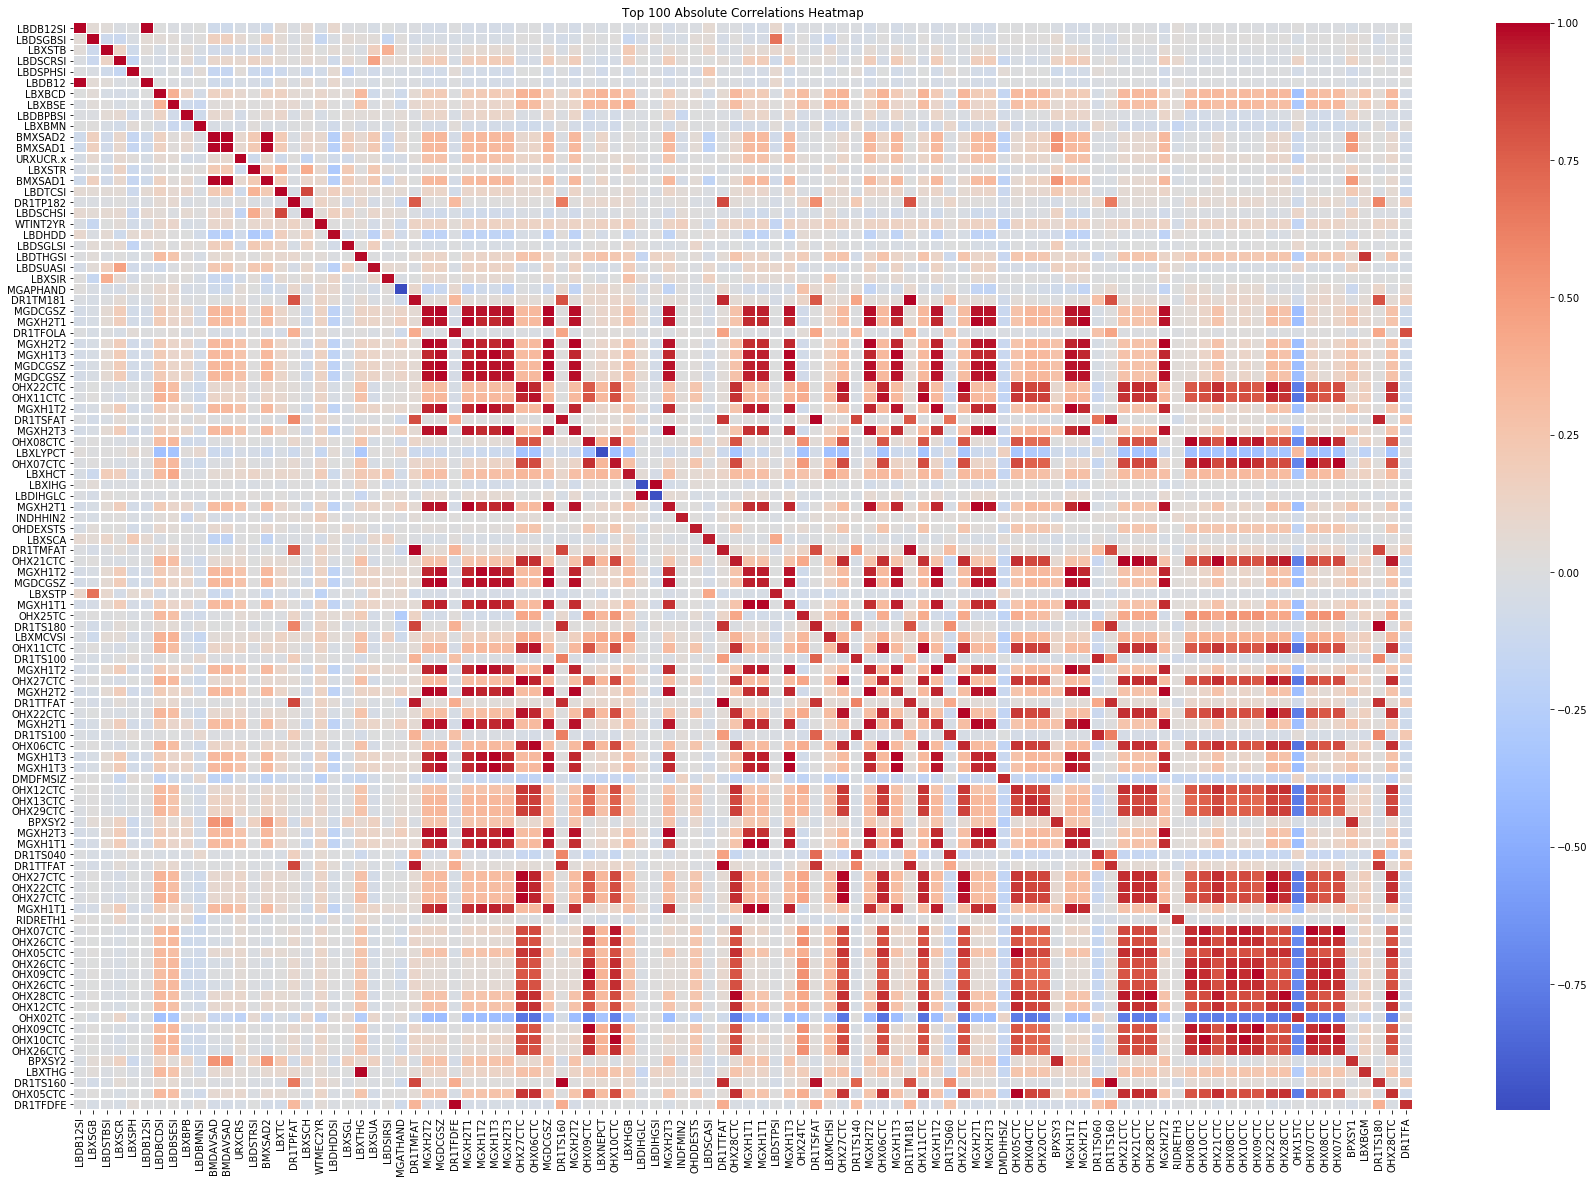

In [28]:
#visualizing top 100 features with heatmap
correlation_matrix = corr
top_abs_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(100)
top_abs_correlation_df = pd.DataFrame(top_abs_correlations, columns=['Absolute Correlation'])
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix.loc[top_abs_correlation_df.index.get_level_values(0), top_abs_correlation_df.index.get_level_values(1)],
            annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Top 100 Absolute Correlations Heatmap")
plt.show()

### Feature Selection

* Removing features which are so correlated with another and represent that
* In this approach we should be careful about the duplicates

In [29]:
# Remove one of high correlated features of each pair columns
def drop_similarFeatures(df, threshold):
    correlation_matrix = df.corr()
    similar_features = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
    similar_features = similar_features.sum() > 1
    similar_features = similar_features[similar_features].index
    if not similar_features.empty:
        df = df.drop(columns=similar_features)

    return df

In [30]:
df_fs = drop_similarFeatures(nor_merged_df, 0.80)
df_fs

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBDBCDLC,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,1.0,0.0,0.0000,0.50,0.4,1.0,1.0,0.0,0.0,0.75,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
1,1.0,1.0,0.3625,1.00,0.4,0.0,1.0,0.0,0.0,0.75,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.224359,0.147915,0.466981,0.467851
2,1.0,0.0,0.1250,0.75,0.6,0.0,1.0,0.0,0.0,0.75,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.310897,0.194119,0.466981,0.467851
3,1.0,0.0,0.0125,0.75,0.6,0.0,1.0,0.0,0.0,0.75,...,1.0,0.0,0.737646,0.736434,0.270363,0.270365,0.275641,0.194119,0.466981,0.467851
4,1.0,0.0,0.2000,0.75,0.6,1.0,1.0,0.0,0.0,0.75,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.314103,0.202820,0.466981,0.467851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,1.0,0.0,0.3250,0.25,0.2,1.0,1.0,0.0,0.0,1.00,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
3317,1.0,1.0,0.0250,0.00,0.0,1.0,1.0,0.0,0.0,0.75,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
3318,1.0,1.0,0.5250,0.75,0.6,1.0,1.0,1.0,0.0,1.00,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851
3319,1.0,0.0,0.3625,0.25,0.2,0.0,1.0,0.0,0.0,0.75,...,0.0,0.0,0.540464,0.542636,0.434634,0.433960,0.275641,0.194119,0.466981,0.467851


### Dimension Reduction

* Using PCA and TSN-E as my own method to reduce dimensions of dataframe which cause to improve the performance of following models

In [31]:
#PCA method
def use_PCA(df, n_comp):
    X = df.values
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)

    columns = [f'PC{i+1}' for i in range(n_comp)]
    df_pca = pd.DataFrame(data=X_pca, columns=columns)
    
    return df_pca

In [32]:
df_pca2 = use_PCA(df_fs, 2)
df_pca2

,PC1,PC2
0,-0.378601,-1.278153
1,-0.354159,0.412608
2,0.204132,-0.868186
3,-0.795987,-0.201778
4,0.174399,0.043938
...,...,...
3316,0.353647,-1.210468
3317,-0.104190,-1.080100
3318,0.777504,-1.273308
3319,-0.094386,-1.110949


In [33]:
#method TSNE
def use_TSNE(df, n_comp):
    X = df.values
    tsne = TSNE(n_components=n_comp, random_state=42)
    X_tsne = tsne.fit_transform(X)

    columns = [f'Dim{i+1}' for i in range(n_comp)]
    df_tsne = pd.DataFrame(data=X_tsne, columns=columns)
    
    return df_tsne

In [148]:
df_tsne3 = use_TSNE(df_fs, 3)
df_tsne3

,Dim1,Dim2,Dim3
0,-33.055210,31.315344,7.137622
1,-17.447056,-11.747568,4.827420
2,0.625703,19.355515,4.942419
3,1.316256,46.187481,8.406045
4,17.974586,21.437172,-19.480984
...,...,...,...
3316,38.593712,6.116182,14.929951
3317,6.863914,8.930429,0.954897
3318,16.925276,-12.978722,-19.866037
3319,2.540437,15.589290,-15.228794


# Model Training

* Now, we are going to train a model for the dataset which was the result of PCA method.

In [152]:
x = df_pca2
y = questionnaire.drop('SEQN', axis=1).reset_index().drop('index',axis=1)


In [153]:
xy_df = x.join(y)
xy_df.dropna(inplace=True)
xy_df = xy_df.reset_index().drop(index=1677) #Contained useless value that must be dropped.
xy_df.head()

,index,PC1,PC2,MCQ160L,MCQ220
0,1,-0.354159,0.412608,2.0,2.0
1,2,0.204132,-0.868186,2.0,1.0
2,4,0.174399,0.043938,2.0,2.0
3,6,0.597592,-0.590230,2.0,2.0
4,7,-0.146486,-0.057086,2.0,2.0


In [156]:
X = xy_df.drop(['MCQ160L','MCQ220'], axis=1)
y1 = xy_df['MCQ160L']
y2 = xy_df['MCQ220']


mdl = LogisticRegression() #define LogisticRegression

#training model for the first target

np.random.seed(100)
X1_train, X1_test, y1_train , y1_test=train_test_split(X,
                                                  y1,
                                                  test_size=0.2)

model1 = mdl.fit(X1_train, y1_train)
accuracy1 = model1.score(X1_test, y1_test)


#training model for the second target

X2_train, X2_test, y2_train , y2_test=train_test_split(X,
                                                  y2,
                                                  test_size=0.2)

model2 = mdl.fit(X2_train, y2_train)
accuracy2 = model2.score(X2_test, y2_test)

print("accuracy of MCQ160L: ", accuracy1)
print("accuracy of MCQ220: ", accuracy2)

accuracy of MCQ160L:  0.9606299212598425
accuracy of MCQ220:  0.868766404199475


* Now, we are going to train a model for the dataset which was the result of my own method.

In [149]:
x = df_tsne3
y = questionnaire.drop('SEQN', axis=1).reset_index().drop('index',axis=1)

In [150]:
xy_df = x.join(y)
xy_df.dropna(inplace=True)
xy_df = xy_df.reset_index().drop(index=1677) #Contained useless value that must be dropped.
xy_df.head()

,index,Dim1,Dim2,Dim3,MCQ160L,MCQ220
0,1,-17.447056,-11.747568,4.827420,2.0,2.0
1,2,0.625703,19.355515,4.942419,2.0,1.0
2,4,17.974586,21.437172,-19.480984,2.0,2.0
3,6,35.913658,23.010038,2.772541,2.0,2.0
4,7,-0.687220,-10.316020,34.668053,2.0,2.0


In [155]:
X = xy_df.drop(['MCQ160L','MCQ220'], axis=1)
y1 = xy_df['MCQ160L']
y2 = xy_df['MCQ220']


mdl = LogisticRegression() #define LogisticRegression

#training model for the first target

np.random.seed(100)
X1_trainP, X1_testP, y1_trainP, y1_testP = train_test_split(X,
                                                  y1,
                                                  test_size=0.2)

model1 = mdl.fit(X1_trainP, y1_trainP)
accuracy1 = model1.score(X1_testP, y1_testP)


#training model for the second target

X2_trainP, X2_testP, y2_trainP, y2_testP=train_test_split(X,
                                                  y2,
                                                  test_size=0.2)

model2 = mdl.fit(X2_trainP, y2_trainP)
accuracy2 = model2.score(X2_testP, y2_testP)

print("accuracy of MCQ160L: ", accuracy1)
print("accuracy of MCQ220: ", accuracy2)

accuracy of MCQ160L:  0.9606299212598425
accuracy of MCQ220:  0.868766404199475


* By comparing the results, they are no difference between my method and PCA. I will describe how they work and compare them specificly at the end of notebook.

### Tunning Hyperprameters

* In this part, we want to tunne the hyperprameters of each condition and compare the results.

In [115]:
log_reg_grid = {
    'C': uniform(0.1, 10), 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

In [116]:
rs_log = RandomizedSearchCV(estimator=LogisticRegression(),
                            param_distributions=log_reg_grid,
                            cv=5,
                            n_iter=200,
                            verbose=True)

In [117]:
#discovering best parameters for first target (PCA)
rs_model1 = rs_log.fit(X1_train, y1_train)
rs_model1.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'C': 7.888709540017561,
 'max_iter': 300,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [118]:
#discovering best parameters for second target (PCA)
rs_model2 = rs_log.fit(X2_train, y2_train)
rs_model2.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'C': 7.958612082473072,
 'max_iter': 400,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [159]:
print("Best score of target 1:", rs_model1.score(X1_test, y1_test))
print("Best score of target 2:", rs_model2.score(X2_test, y2_test))

Best score of target 1: 0.9606299212598425
Best score of target 2: 0.868766404199475


In [157]:
#discovering best parameters for first target (my Own)
rs_model1P = rs_log.fit(X1_trainP, y1_trainP)
rs_model1P.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'C': 7.888709540017561,
 'max_iter': 300,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [158]:
#discovering best parameters for first target (my Own)
rs_model2P = rs_log.fit(X2_trainP, y2_trainP)
rs_model2P.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'C': 7.958612082473072,
 'max_iter': 400,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [160]:
print("Best score of target 1:", rs_model1P.score(X1_testP, y1_testP))
print("Best score of target 2:", rs_model2P.score(X2_testP, y2_testP))

Best score of target 1: 0.9606299212598425
Best score of target 2: 0.868766404199475


* We found out that the first time we reached the best score that is possible!
* And again no difference was seen between the results of PCA and my own method

# Model Evaluation

##### Logistic Regression Evaluation
* Accuracy
* Precision
* Recall
* F1
* ROC Curve and AUC
* Confusion Matrix

###### Notice: Due to similarity of results of both method for dimension reduction, I evaluate only the PCA model further more.

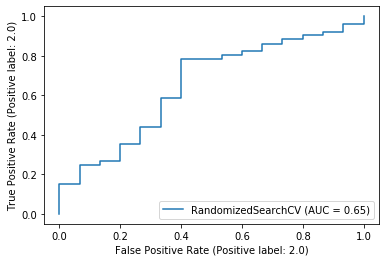

In [120]:
#plotting ROC curve for model of target 1
plot_roc_curve(rs_model1,
              X1_test,
              y1_test);

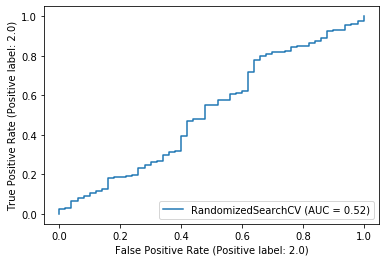

In [121]:
#plotting ROC curve for model of target 2
plot_roc_curve(rs_model2,
              X2_test,
              y2_test);

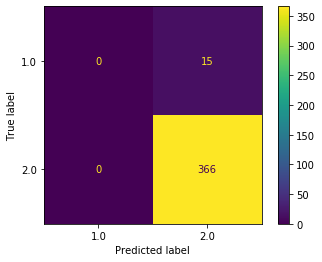

In [122]:
#plotting Confusion matrix for model of target 1
plot_confusion_matrix(rs_model1,
              X1_test,
              y1_test);

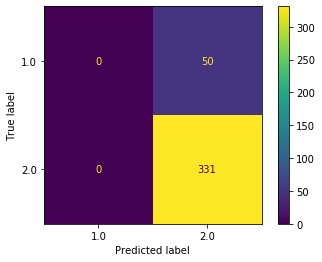

In [123]:
#plotting Confusion matrix for model of target 2
plot_confusion_matrix(rs_model2,
              X2_test,
              y2_test);

* According to confusion matrix, all of predicted values are 2.0.
* I think that is because of bias data which more than 95 percent of each target feature is 2.0, So it's OK :))

In [124]:
#report of some metrics for target 1
print(classification_report(y1_test,
                      rs_model1.predict(X1_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        15
         2.0       0.96      1.00      0.98       366

    accuracy                           0.96       381
   macro avg       0.48      0.50      0.49       381
weighted avg       0.92      0.96      0.94       381



In [125]:
#report of some metrics for target 2
print(classification_report(y2_test,
                      rs_model2.predict(X2_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        50
         2.0       0.87      1.00      0.93       331

    accuracy                           0.87       381
   macro avg       0.43      0.50      0.46       381
weighted avg       0.75      0.87      0.81       381



# Conclusion

#### Difference between the methods of dimension reduction which were used?
* PCA is useful for preserving global structure and reducing dimensionality when linearity is a reasonable assumption.
* t-SNE is effective for visualizing clusters and maintaining local relationships, making it suitable for exploratory data analysis and visualization.
* I tried both of them in this project. However, the results were similar.

#### In your opinion, was dimension reduction useful? Does it effect in a good or bad way?
* As we saw, datasets has too many features and it is a big problem to train a model base on thease datasets. So we must deal with them with some methods like feature selection or extraction and dimension reduction to get better results. On the other hands, it has some impact on the datasets. I mentioned some of the advantages and considerations of using dimension reduction below:

###### Advantages:
* Improved Model Performance
* Computational Efficiency
* Enhanced Interpretability
* Visualization

###### Considerations:
* Information Loss
* Algorithm Sensitivity
* Assumption Validity
* Domain-Specific Considerations

#### Compare PCA and TSN-E in some aspects like speed.
* PCA is faster and efficient for large datasets, but it provides a linear representation of the data.
* t-SNE is slower but excels in capturing non-linear, local structures, making it suitable for visualization and exploratory analysis.